# Project statement:
AAL, established in 2000, is a well-known brand in Australia, particularly recognized for its clothing business. It has opened branches in various states, metropolises, and tier-1 and tier-2 cities across the country.

The brand caters to all age groups, from kids to the elderly.
Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the CEO has assigned the responsibility to the head of AAL’s sales and marketing (S&M) department. The specific tasks include:

1) Identify the states that are generating the highest revenues.
2) Develop sales programs for states with lower revenues. The head of sales and marketing has requested your assistance with this task.
Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:

# Load the dataset
# file_path = "/mnt/data/AusApparalSales4thQrt2020.csv"
df = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [7]:

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')


In [8]:

# Normalization of numerical columns using Min-Max Scaling
numerical_cols = ['Sales', 'Unit']
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].min()) / (df[numerical_cols].max() - df[numerical_cols].min())


In [9]:

# GroupBy for state-wise sales analysis
statewise_sales = df.groupby("State")["Sales"].sum().reset_index()
print("\nStatewise Sales Summary:")
print(statewise_sales)



Statewise Sales Summary:
  State       Sales
0   NSW  441.714286
1    NT  109.079365
2   QLD  177.888889
3    SA  339.412698
4   TAS  110.222222
5   VIC  635.968254
6    WA  106.365079


In [10]:

# Descriptive statistics for Sales and Units
print("\nDescriptive Statistics:")
print(df[['Sales', 'Unit']].describe())



Descriptive Statistics:
             Sales         Unit
count  7560.000000  7560.000000
mean      0.254054     0.254054
std       0.204784     0.204784
min       0.000000     0.000000
25%       0.095238     0.095238
50%       0.190476     0.190476
75%       0.380952     0.380952
max       1.000000     1.000000


In [11]:

# Identifying the highest and lowest sales groups
highest_sales_group = df.groupby("Group")["Sales"].sum().idxmax()
lowest_sales_group = df.groupby("Group")["Sales"].sum().idxmin()
print(f"\nHighest Sales Group: {highest_sales_group}")
print(f"Lowest Sales Group: {lowest_sales_group}")



Highest Sales Group:  Men
Lowest Sales Group:  Seniors


In [12]:

# Generating weekly, monthly, and quarterly reports
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter


In [13]:

weekly_report = df.groupby('Week')[['Sales', 'Unit']].sum()
monthly_report = df.groupby('Month')[['Sales', 'Unit']].sum()
quarterly_report = df.groupby('Quarter')[['Sales', 'Unit']].sum()

# Display the reports
print("\nWeekly Sales Report:")
print(weekly_report)
print("\nMonthly Sales Report:")
print(monthly_report)
print("\nQuarterly Sales Report:")
print(quarterly_report)



Weekly Sales Report:
           Sales        Unit
Week                        
40     84.857143   84.857143
41    152.777778  152.777778
42    150.476190  150.476190
43    151.587302  151.587302
44    122.460317  122.460317
45    113.809524  113.809524
46    115.761905  115.761905
47    115.380952  115.380952
48    117.698413  117.698413
49    169.412698  169.412698
50    181.492063  181.492063
51    182.317460  182.317460
52    183.047619  183.047619
53     79.571429   79.571429

Monthly Sales Report:
            Sales        Unit
Month                        
10     645.650794  645.650794
11     495.761905  495.761905
12     779.238095  779.238095

Quarterly Sales Report:
               Sales         Unit
Quarter                          
4        1920.650794  1920.650794


C:\Users\hp\AppData\Local\Temp\ipykernel_15576\345398641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=statewise_sales, x='State', y='Sales', palette='viridis')


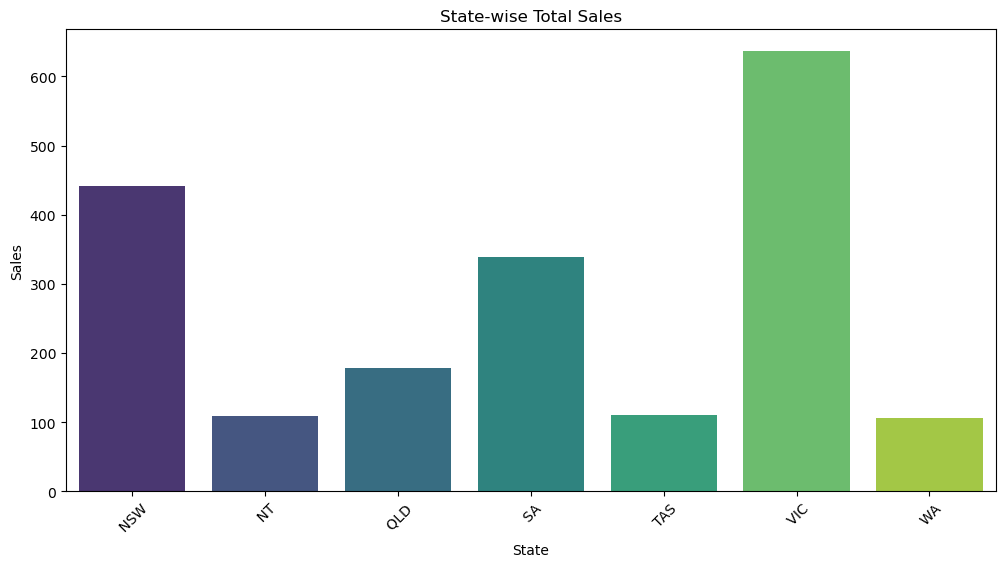

In [14]:

# Visualization: State-wise Sales Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=statewise_sales, x='State', y='Sales', palette='viridis')
plt.xticks(rotation=45)
plt.title("State-wise Total Sales")
plt.xlabel("State")
plt.ylabel("Sales")
plt.show()


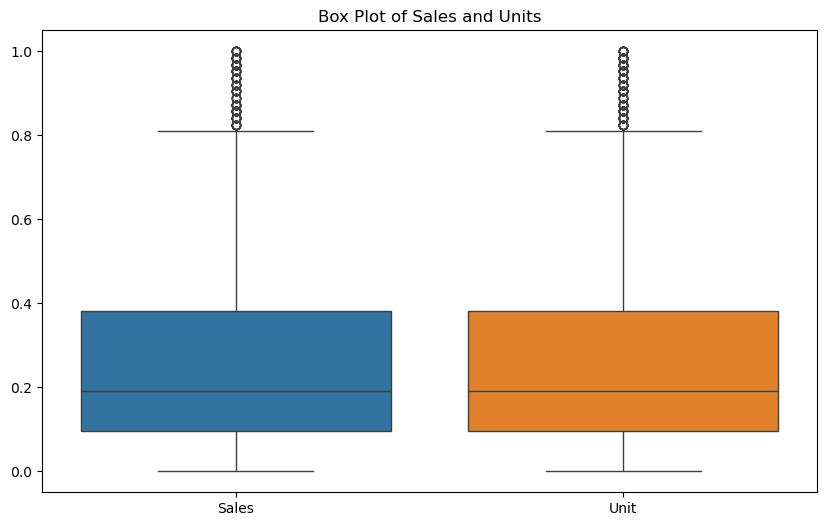

In [15]:

# Box plot for descriptive statistics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Sales', 'Unit']])
plt.title("Box Plot of Sales and Units")
plt.show()


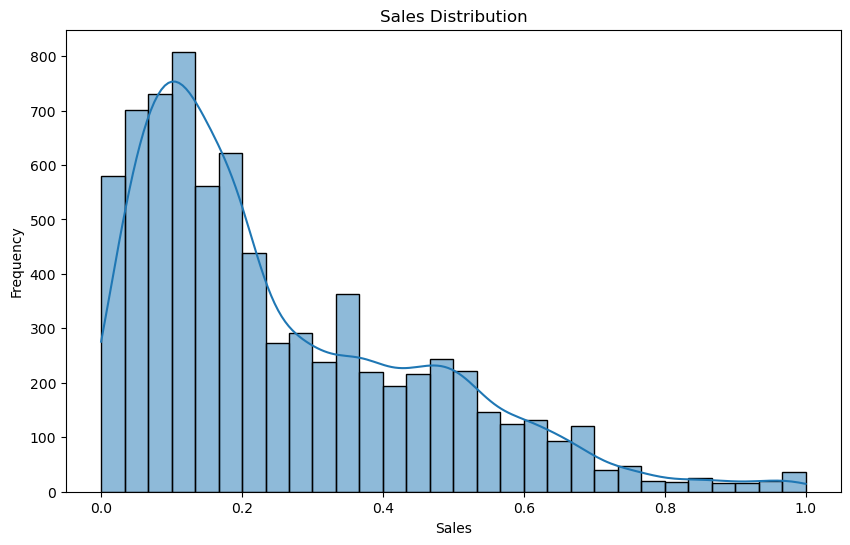

In [16]:

# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15576\2030872798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_sales, x='Time', y='Sales', palette='coolwarm')


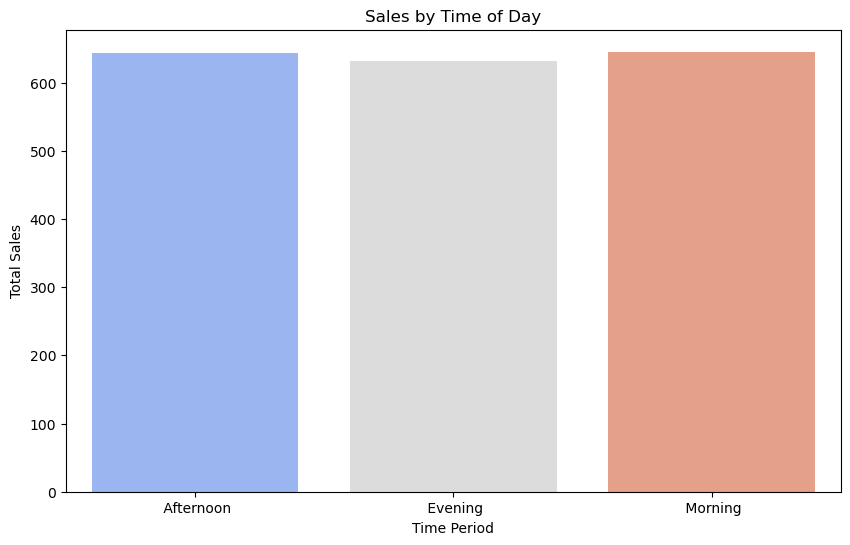

In [17]:

# Time-of-day analysis for peak and off-peak sales
time_sales = df.groupby("Time")["Sales"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=time_sales, x='Time', y='Sales', palette='coolwarm')
plt.title("Sales by Time of Day")
plt.xlabel("Time Period")
plt.ylabel("Total Sales")
plt.show()


In [18]:

# Recommendation for low-revenue states
top_states = statewise_sales.sort_values(by='Sales', ascending=False).head(5)
low_states = statewise_sales.sort_values(by='Sales', ascending=True).head(5)
print("\nTop 5 Revenue-Generating States:")
print(top_states)
print("\nBottom 5 Low-Revenue States:")
print(low_states)



Top 5 Revenue-Generating States:
  State       Sales
5   VIC  635.968254
0   NSW  441.714286
3    SA  339.412698
2   QLD  177.888889
4   TAS  110.222222

Bottom 5 Low-Revenue States:
  State       Sales
6    WA  106.365079
1    NT  109.079365
4   TAS  110.222222
2   QLD  177.888889
3    SA  339.412698


In [19]:

# Recommendations
print("\nRecommendations:")
print("1. Focus marketing campaigns in low-revenue states to boost sales.")
print("2. Improve inventory management based on peak sales hours.")
print("3. Introduce personalized offers during off-peak hours to increase revenue.")



Recommendations:
1. Focus marketing campaigns in low-revenue states to boost sales.
2. Improve inventory management based on peak sales hours.
3. Introduce personalized offers during off-peak hours to increase revenue.
